In [4]:
import os
import zipfile

local_zip='./rps.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall()

local_zip='./rps-test-set.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall()
zip_ref.close()

In [5]:
train_rock_dir=os.path.join('./rps','rock')
train_paper_dir=os.path.join('./rps','paper')
train_scissor_dir=os.path.join('./rps','scissors')

val_rock_dir=os.path.join('./rps-test-set','rock')
val_paper_dir=os.path.join('./rps-test-set','paper')
val_scissor_dir=os.path.join('./rps-test-set','scissors')

In [6]:
train_rock_names=os.listdir(train_rock_dir)
train_paper_names=os.listdir(train_paper_dir)
train_scissor_names=os.listdir(train_scissor_dir)

val_rock_names=os.listdir(val_rock_dir)
val_paper_names=os.listdir(val_paper_dir)
val_scissor_names=os.listdir(val_scissor_dir)

print('No of training rock images are', len(train_rock_names))
print('No of training paper images are', len(train_paper_names))
print('No of training scissor images are', len(train_scissor_names))
print('No of test rock images are', len(val_rock_names))
print('No of test paper images are', len(val_paper_names))
print('No of test scissor images are', len(val_scissor_names))

No of training rock images are 840
No of training paper images are 840
No of training scissor images are 840
No of test rock images are 124
No of test paper images are 124
No of test scissor images are 124


In [17]:
import tensorflow as tf
from tensorflow import keras

model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(16,3,activation='relu',input_shape=(300,300,3)),
                                  tf.keras.layers.MaxPooling2D(2),
                                  tf.keras.layers.Conv2D(32,3,activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2),
                                  tf.keras.layers.Conv2D(64,3,activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2),
                                  tf.keras.layers.Conv2D(128,3,activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(256,activation='relu'),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(64,activation='relu'),
                                  tf.keras.layers.Dense(3,activation='softmax')
])

In [28]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [31]:
train_generator=train_datagen.flow_from_directory('./rps',
                                                  target_size=(300,300),
                                                  batch_size=126,
                                                  class_mode='categorical')
validation_generator=test_datagen.flow_from_directory('./rps-test-set',
                                                      target_size=(300,300),
                                                      batch_size=126,
                                                      class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [32]:
history=model.fit_generator(train_generator,
                            steps_per_epoch=20,
                            epochs=20,
                            validation_data=validation_generator,
                            validation_steps=3,verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
20/20 [==============================] - 278s 14s/step - loss: 1.1628 - accuracy: 0.3611 - val_loss: 1.0849 - val_accuracy: 0.4785
Epoch 2/20
20/20 [==============================] - 270s 13s/step - loss: 1.0382 - accuracy: 0.4702 - val_loss: 0.9229 - val_accuracy: 0.6183
Epoch 3/20
20/20 [==============================] - 275s 14s/step - loss: 0.8102 - accuracy: 0.6254 - val_loss: 0.5154 - val_accuracy: 0.7446
Epoch 4/20
20/20 [==============================] - 272s 13s/step - loss: 0.5706 - accuracy: 0.7651 - val_loss: 0.3054 - val_accuracy: 0.9301
Epoch 5/20
20/20 [==============================] - 278s 14s/step - loss: 0.4341 - accuracy: 0.8274 - val_loss: 0.2199 - val_accuracy: 0.9409
Epoch 6/20
20/20 [==============================] - 273s 14s/step - loss: 0.3833 - accuracy: 0.8560 - val_loss: 0.1783 - val_accuracy: 0.9005
Epoch 7/20
20/20 [==============================] - 271s 13s/step - loss: 0.2896 - accuracy: 0.8968 - val_loss: 0.1327 - val_accuracy: 0.9543
Epoch 

In [37]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
  path=fn

  img=image.load_img(path,target_size=(300,300))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)

  images=np.vstack([x])

  classes=model.predict(images,batch_size=10)
  print(fn)
  print(classes)

Saving Paper 1.jfif to Paper 1.jfif
Paper 1.jfif
[[1. 0. 0.]]


<Figure size 432x288 with 0 Axes>

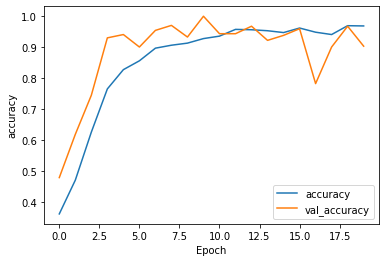

<Figure size 432x288 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.figure()



In [40]:
model.save("rps.h5")